In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import math
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
drug_df = pd.read_csv("drug200.csv")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# drug type is the target feature
x = drug_df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = drug_df[["Drug"]]

<h2> Preprocessing the data </h2>

In [4]:
x["Sex"] = x["Sex"].map({"F":0, "M":1})
x["BP"] = x["BP"].map({"LOW":0, "NORMAL":1, "HIGH":2})
x["Cholesterol"] = x["Cholesterol"].map({"LOW":0, "NORMAL":1, "HIGH":2})

In [5]:
x = x.to_numpy()
y = y.to_numpy()
x_scaled = preprocessing.scale(x)
print(x_scaled.shape)

(200, 5)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, train_size=0.75, random_state=42)
y_train = y_train.reshape((y_train.shape[0]), 1)
print(x_train.shape)
print(y_train.shape)

(150, 5)
(150, 1)


<h1> Logistic Regression with Lasso Regularization <h1>

In [7]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga', max_iter=2000)
    logreg.fit(X_train, Y_train.ravel())
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("C = ",c)
    print("Accuracy on training data = %f" % acc_train)
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print()
    c_logreg.append(c)

In [8]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, x_train, y_train, x_test, y_test)

C =  0.0001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.01
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.1
Accuracy on training data = 0.375733
Accuracy on test data = 0.346000

C =  1
Accuracy on training data = 0.319467
Accuracy on test data = 0.270000

C =  10
Accuracy on training data = 0.316444
Accuracy on test data = 0.275600



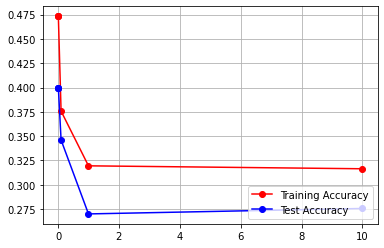

In [9]:
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

<h1> Logistic Regression with Ridge Regularization </h1>

In [10]:
acc_train_logreg2 = [] 
acc_test_logreg2 = []
c_logreg2 = []

In [11]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = LogisticRegression(C=c, warm_start=True, max_iter=2000)
    logreg2.fit(X_train, Y_train.ravel())
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("C = ",c)
    print("Accuracy on training data = %f" % acc_train)
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print()
    c_logreg2.append(c)

In [12]:
for c in cVals:
    logreg2_model(c, x_train, y_train, x_test, y_test)

C =  0.0001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.01
Accuracy on training data = 0.453422
Accuracy on test data = 0.384000

C =  0.1
Accuracy on training data = 0.357244
Accuracy on test data = 0.311600

C =  1
Accuracy on training data = 0.324889
Accuracy on test data = 0.288000

C =  10
Accuracy on training data = 0.319289
Accuracy on test data = 0.270000



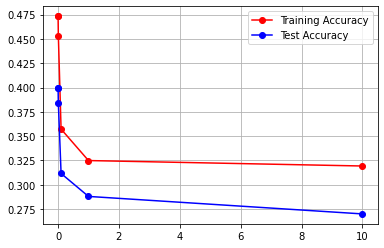

In [13]:
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

<h1> Logistic Regression Using Polynomial Feature Transformation <h1>

In [14]:
poly = PolynomialFeatures(degree=2)
x_transformed_train = poly.fit_transform(x_train)
x_transformed_test = poly.fit_transform(x_test)

C =  0.0001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.01
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.1
Accuracy on training data = 0.356089
Accuracy on test data = 0.329200

C =  1
Accuracy on training data = 0.316444
Accuracy on test data = 0.281200

C =  10
Accuracy on training data = 0.316444
Accuracy on test data = 0.275600



/Users/simransoin/src/IntroToML/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


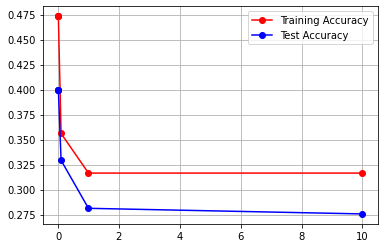

In [15]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Call the function logreg_model.
for c in cVals:
    logreg_model(c, x_transformed_train, y_train, x_transformed_test, y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
# Use the code that you wrote to draw the plot for logreg_model()

plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

C =  0.0001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.001
Accuracy on training data = 0.473333
Accuracy on test data = 0.400000

C =  0.01
Accuracy on training data = 0.434933
Accuracy on test data = 0.374000

C =  0.1
Accuracy on training data = 0.320756
Accuracy on test data = 0.297600

C =  1
Accuracy on training data = 0.317867
Accuracy on test data = 0.275600

C =  10
Accuracy on training data = 0.316444
Accuracy on test data = 0.275600



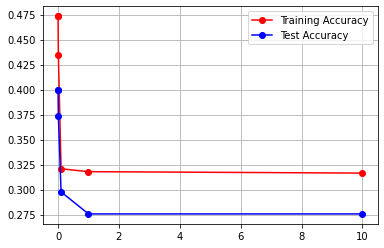

In [16]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# Call the function logreg2_model.
for c in cVals:
    logreg2_model(c, x_transformed_train, y_train, x_transformed_test, y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
# Use the code that you wrote to draw the plot for logreg2_model()

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')